___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

## Indest Data

In [1]:
df = pd.read_csv("Churn_Modelling.csv", index_col="RowNumber")
df.head(5)

NameError: name 'pd' is not defined

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Figure size 288x432 with 0 Axes>

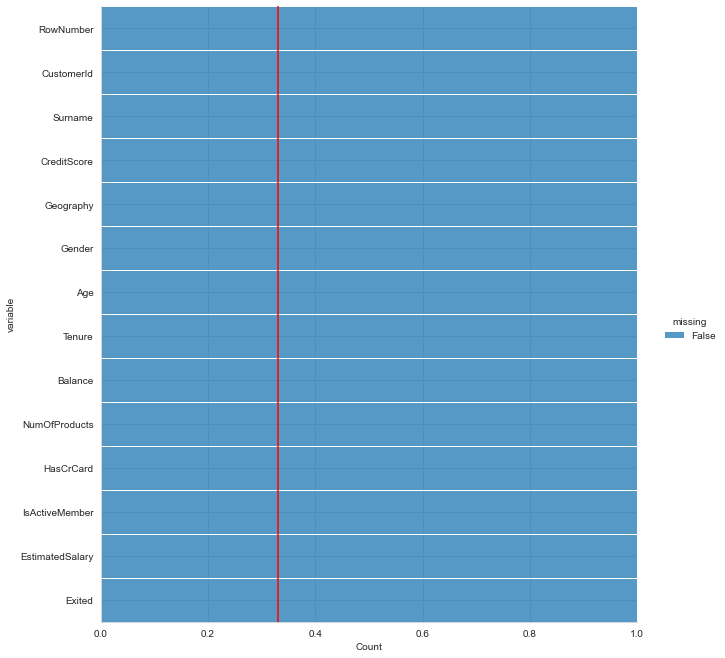

In [5]:
plt.figure(figsize=(4,6))

sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.33, color="r");

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


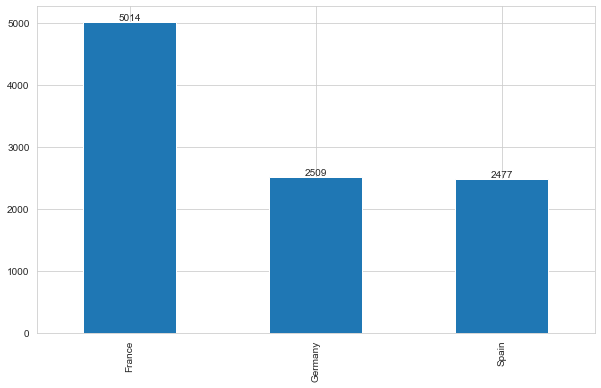

In [8]:
ax = df["Geography"].value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

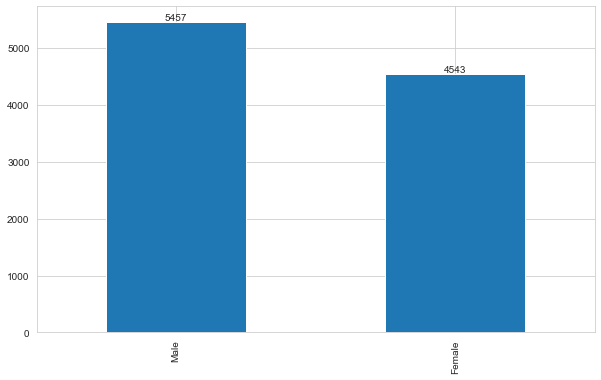

In [9]:
ax = df["Gender"].value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

In [10]:
df1 = df.copy()

In [11]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Target feature inceleyince imbalanced bir durum olduğunu görüyorum.

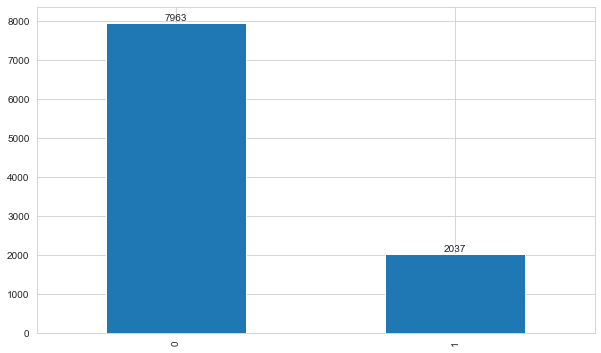

In [12]:
ax = df1["Exited"].value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

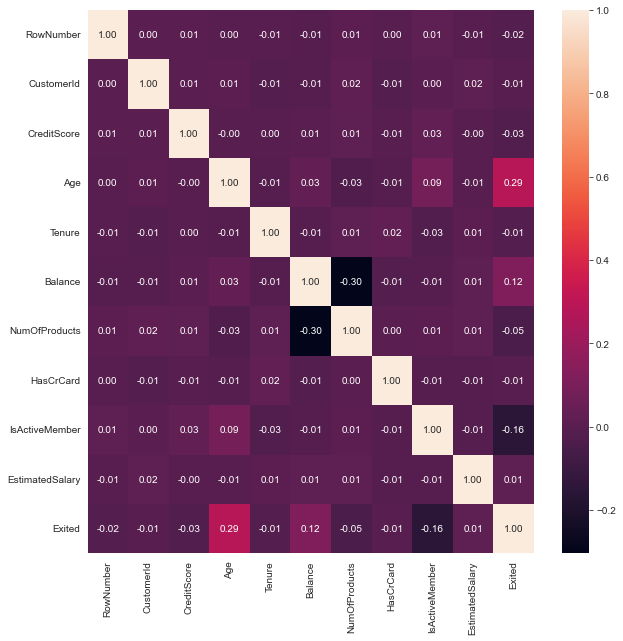

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True,fmt=".2f");


Feature lar arasındaki corr. bakınca yüksek bir corr. durumunun söz konusu olmadığını görebiliyorum. Ayrıca unique olan feature ları drop ediyorum.

In [14]:
df1 = df1.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

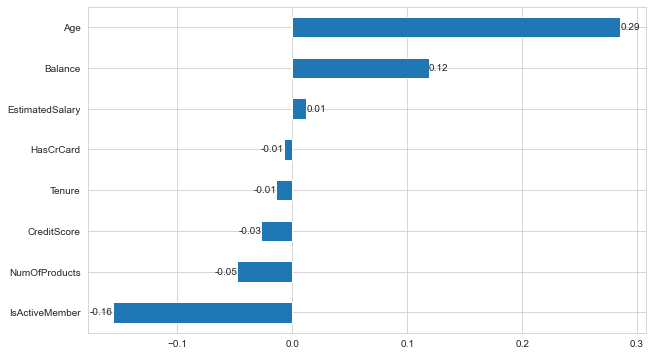

In [15]:
ax = df1.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

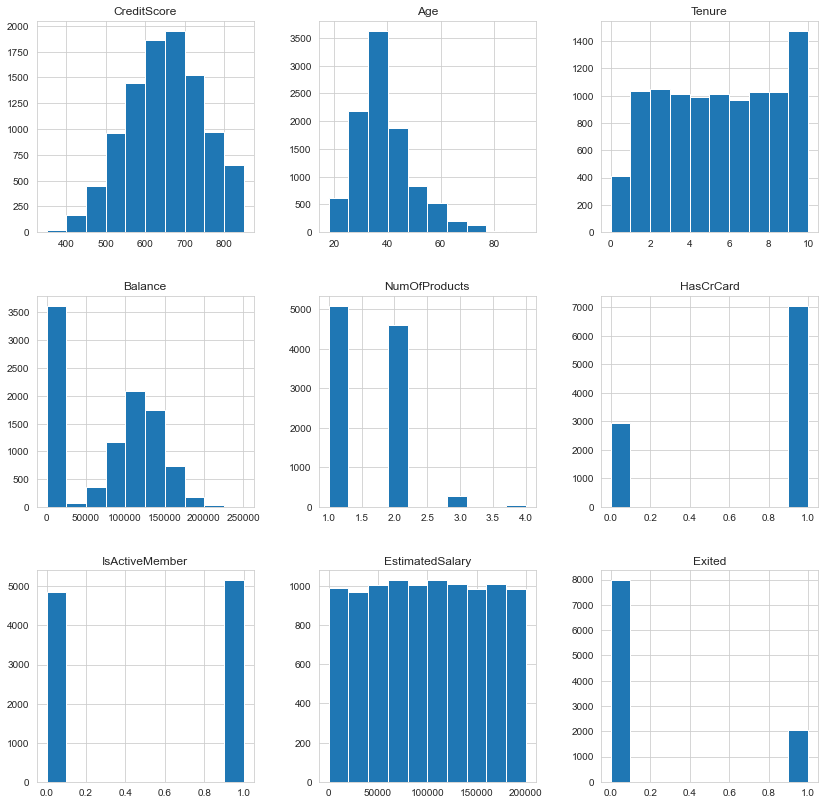

In [16]:
df1.hist(figsize=(14,14));


In [17]:
geo_dummy = pd.get_dummies(df1["Geography"], prefix = "Geo")
df1 = pd.concat([df1, geo_dummy], axis = 1)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,0,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0,0,1
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,0,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,1,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,0,1


In [18]:
gender_dummy = pd.get_dummies(df1["Gender"], prefix = "Gender")
df1 = pd.concat([df1, gender_dummy], axis = 1)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


In [19]:
df1 = df1.drop(["Geography", "Gender"], axis = 1)
df1.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


## Preprocessing of Data
- Train | Test Split, Scalling

In [20]:
X = df1.drop(['Exited'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1,0


In [21]:
y = df1.Exited
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [22]:
seed = 42

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

<IPython.core.display.Javascript object>

In [24]:
scaler = MinMaxScaler()

<IPython.core.display.Javascript object>

In [25]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
tf.__version__

'2.8.0'

In [29]:
X_train.shape

(8000, 13)

In [30]:
X_test.shape

(2000, 13)

### Creating Model

### without class_weigth

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [32]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [33]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
213/213 [==============================] - 1s 1ms/step - loss: 0.4992 - accuracy: 0.7944 - val_loss: 0.4561 - val_accuracy: 0.8067
Epoch 2/1000
213/213 [==============================] - 0s 881us/step - loss: 0.4642 - accuracy: 0.7931 - val_loss: 0.4423 - val_accuracy: 0.8100
Epoch 3/1000
213/213 [==============================] - 0s 903us/step - loss: 0.4486 - accuracy: 0.8035 - val_loss: 0.4224 - val_accuracy: 0.8225
Epoch 4/1000
213/213 [==============================] - 0s 919us/step - loss: 0.4315 - accuracy: 0.8149 - val_loss: 0.4089 - val_accuracy: 0.8367
Epoch 5/1000
213/213 [==============================] - 0s 904us/step - loss: 0.4192 - accuracy: 0.8191 - val_loss: 0.4111 - val_accuracy: 0.8308
Epoch 6/1000
213/213 [==============================] - 0s 838us/step - loss: 0.4114 - accuracy: 0.8241 - val_loss: 0.3950 - val_accuracy: 0.8425
Epoch 7/1000
213/213 [==============================] - 0s 890us/step - loss: 0.4041 - accuracy: 0.8290 - val_loss: 0.3907 - v

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 30) dtype=float32, numpy=
 array([[ 1.05467096e-01, -3.93689089e-02, -8.97094160e-02,
         -2.20883526e-02, -9.14149061e-02,  1.43183112e-01,
          3.20223391e-01,  3.24894279e-01, -1.73033834e-01,
         -2.09945455e-01,  2.05057543e-02,  2.38216624e-01,
         -1.43175647e-01,  1.11379199e-01, -2.30662078e-02,
          3.50566834e-01, -2.27441460e-01,  1.60310447e-01,
          1.57231018e-01, -9.85217988e-02,  1.31039575e-01,
          1.65801793e-02, -5.62754154e-01,  1.58136651e-01,
          1.98221371e-01, -6.99636759e-03,  1.50651827e-01,
          1.87107716e-02,  2.52701849e-01,  9.31386128e-02],
        [ 3.77931029e-01,  1.19284563e-01,  1.84582606e-01,
         -3.36001128e-01, -2.54562318e-01, -4.88811553e-01,
          2.45953828e-01,  7.22496331e-01, -5.91045737e-01,
         -3.83527666e-01, -3.50096017e-01,  9.08613622e-01,
          9.70805407e-01, -9.37629223e-01,  6.12273991e-01,
         -7.57397115e-02, -7.96

<AxesSubplot:>

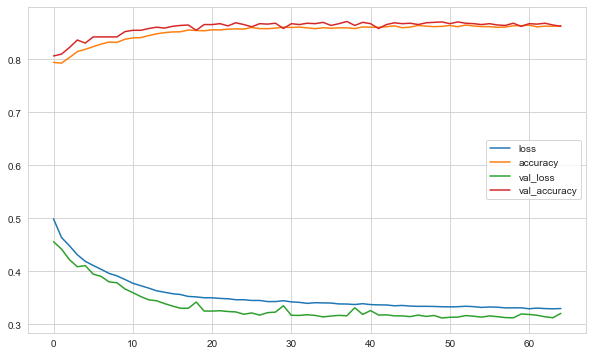

In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [37]:
model.evaluate(X_test, y_test, verbose=0)

[0.3453410267829895, 0.8544999957084656]

In [38]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3453410267829895
accuracy :  0.8544999957084656


In [39]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1500   93]
 [ 198  209]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.69      0.51      0.59       407

    accuracy                           0.85      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



In [40]:
from tensorflow.keras.optimizers import Adam

In [41]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [42]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7964 - val_loss: 0.4326 - val_accuracy: 0.8112
Epoch 2/1000
225/225 [==============================] - 0s 748us/step - loss: 0.4312 - accuracy: 0.8168 - val_loss: 0.3818 - val_accuracy: 0.8450
Epoch 3/1000
225/225 [==============================] - 0s 724us/step - loss: 0.3881 - accuracy: 0.8390 - val_loss: 0.3393 - val_accuracy: 0.8575
Epoch 4/1000
225/225 [==============================] - 0s 727us/step - loss: 0.3674 - accuracy: 0.8472 - val_loss: 0.3358 - val_accuracy: 0.8650
Epoch 5/1000
225/225 [==============================] - 0s 733us/step - loss: 0.3603 - accuracy: 0.8508 - val_loss: 0.3409 - val_accuracy: 0.8625
Epoch 6/1000
225/225 [==============================] - 0s 716us/step - loss: 0.3589 - accuracy: 0.8510 - val_loss: 0.3419 - val_accuracy: 0.8537
Epoch 7/1000
225/225 [==============================] - 0s 719us/step - loss: 0.3538 - accuracy: 0.8565 - val_loss: 0.3178 - v

<AxesSubplot:>

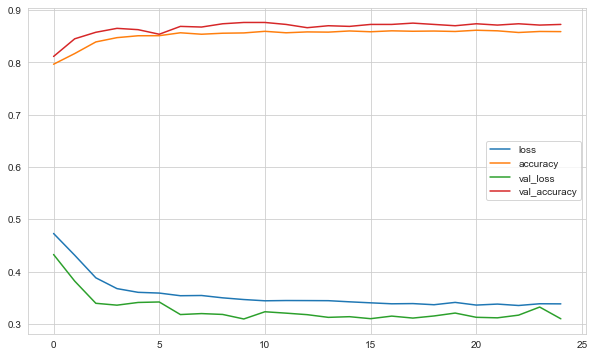

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34437841176986694
accuracy :  0.8579999804496765


In [46]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1557   36]
 [ 248  159]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.82      0.39      0.53       407

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [47]:
from tensorflow.keras.layers import Dropout

In [48]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [49]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 1ms/step - loss: 0.5606 - accuracy: 0.7801 - val_loss: 0.4775 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 0s 762us/step - loss: 0.5130 - accuracy: 0.7932 - val_loss: 0.4645 - val_accuracy: 0.8100
Epoch 3/1000
225/225 [==============================] - 0s 752us/step - loss: 0.5002 - accuracy: 0.7964 - val_loss: 0.4519 - val_accuracy: 0.8100
Epoch 4/1000
225/225 [==============================] - 0s 809us/step - loss: 0.4919 - accuracy: 0.7950 - val_loss: 0.4471 - val_accuracy: 0.8100
Epoch 5/1000
225/225 [==============================] - 0s 811us/step - loss: 0.4878 - accuracy: 0.7947 - val_loss: 0.4454 - val_accuracy: 0.8100
Epoch 6/1000
225/225 [==============================] - 0s 728us/step - loss: 0.4823 - accuracy: 0.7950 - val_loss: 0.4402 - val_accuracy: 0.8100
Epoch 7/1000
225/225 [==============================] - 0s 742us/step - loss: 0.4752 - accuracy: 0.7939 - val_loss: 0.4348 - v

<AxesSubplot:>

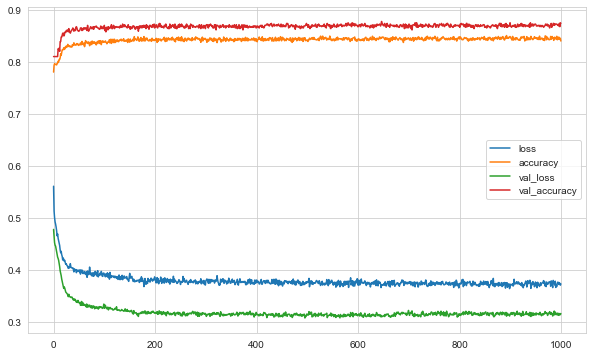

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [51]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3408648371696472
accuracy :  0.8644999861717224


In [52]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1562   31]
 [ 240  167]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.84      0.41      0.55       407

    accuracy                           0.86      2000
   macro avg       0.86      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



#### Evaluate

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [53]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [54]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [55]:
from sklearn.utils import class_weight
keys = np.unique(df["Exited"])
values = class_weight.compute_class_weight("balanced", keys, df["Exited"].values)
cw = dict(zip(keys, values))
cw

{0: 0.6279040562602034, 1: 2.454590083456063}

In [56]:
model.fit(x = X_train, y = y_train, class_weight=cw, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 1ms/step - loss: 0.6362 - accuracy: 0.6583 - val_loss: 0.5236 - val_accuracy: 0.7650
Epoch 2/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7024 - val_loss: 0.5407 - val_accuracy: 0.7287
Epoch 3/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.5274 - accuracy: 0.7396 - val_loss: 0.4898 - val_accuracy: 0.7625
Epoch 4/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7547 - val_loss: 0.4133 - val_accuracy: 0.8112
Epoch 5/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7636 - val_loss: 0.4697 - val_accuracy: 0.7700
Epoch 6/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7704 - val_loss: 0.5048 - val_accuracy: 0.7350
Epoch 7/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7778 - val_loss: 0.4066 - val_accuracy:

<AxesSubplot:>

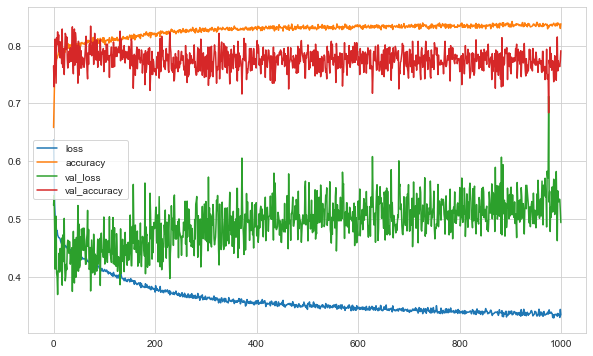

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6080710887908936
accuracy :  0.7875000238418579


In [59]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1321  272]
 [ 153  254]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1593
           1       0.48      0.62      0.54       407

    accuracy                           0.79      2000
   macro avg       0.69      0.73      0.70      2000
weighted avg       0.81      0.79      0.80      2000



#### Evaluate

## GridSearchCV

In [60]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [61]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [62]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [63]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [64]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta],
              'learn_rate': [0.001, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Epoch 1/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7943 - val_loss: 0.4445 - val_accuracy: 0.8100
Epoch 2/200
113/113 [==============================] - 0s 944us/step - loss: 0.4429 - accuracy: 0.8079 - val_loss: 0.4143 - val_accuracy: 0.8288
Epoch 3/200
113/113 [==============================] - 0s 917us/step - loss: 0.4173 - accuracy: 0.8199 - val_loss: 0.3847 - val_accuracy: 0.8425
Epoch 4/200
113/113 [==============================] - 0s 916us/step - loss: 0.3878 - accuracy: 0.8346 - val_loss: 0.3554 - val_accuracy: 0.8587
Epoch 5/200
113/113 [==============================] - 0s 929us/step - loss: 0.3663 - accuracy: 0.8492 - val_loss: 0.3499 - val_accuracy: 0.8650
Epoch 6/200
113/113 [==============================] - 0s 920us/step - loss: 0.3640 - accuracy: 0.8475 - val_loss: 0.3246 - val_accuracy: 0.8625
Epoch 7/200
113/113 [==============================] - 0s 981us/step - 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000024588172D90>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'learn_rate': [0.001, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>]},
             scoring='accuracy', verbose=1)

In [65]:
grid_model.best_score_

0.8552500000000001

In [66]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [67]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result.sort_values("rank_test_score")

,mean_test_score,std_test_score,rank_test_score,params
9,0.855,0.012,1,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
6,0.854,0.011,2,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
10,0.854,0.012,3,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
0,0.853,0.012,4,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
7,0.853,0.008,5,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
4,0.853,0.012,6,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
3,0.853,0.013,7,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
1,0.853,0.013,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
11,0.796,0.013,9,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
2,0.796,0.013,10,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."


#### Evaluate

## Final Model and Model Deployment

In [68]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [69]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "RMSprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [70]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [71]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7962 - val_loss: 0.4787 - val_accuracy: 0.7965
Epoch 2/1000
125/125 [==============================] - 0s 878us/step - loss: 0.4689 - accuracy: 0.7961 - val_loss: 0.4674 - val_accuracy: 0.7940
Epoch 3/1000
125/125 [==============================] - 0s 807us/step - loss: 0.4581 - accuracy: 0.8002 - val_loss: 0.4572 - val_accuracy: 0.7980
Epoch 4/1000
125/125 [==============================] - 0s 694us/step - loss: 0.4467 - accuracy: 0.8051 - val_loss: 0.4473 - val_accuracy: 0.7995
Epoch 5/1000
125/125 [==============================] - 0s 864us/step - loss: 0.4365 - accuracy: 0.8141 - val_loss: 0.4369 - val_accuracy: 0.8090
Epoch 6/1000
125/125 [==============================] - 0s 701us/step - loss: 0.4286 - accuracy: 0.8196 - val_loss: 0.4286 - val_accuracy: 0.8150
Epoch 7/1000
125/125 [==============================] - 0s 737us/step - loss: 0.4214 - accuracy: 0.8204 - val_loss: 0.4225 - v

<AxesSubplot:>

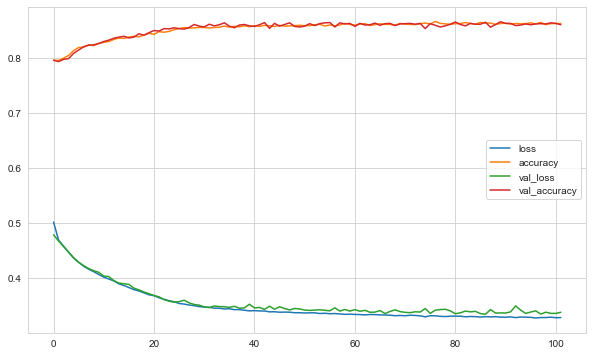

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33772599697113037
accuracy :  0.8610000014305115


In [74]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1517   76]
 [ 202  205]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.73      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [75]:
model.save('model_churn.h5')

### Prediction

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [78]:
single_churn = df1.drop("Exited", axis = 1).iloc[0:1, :]
single_churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [79]:
single_churn = scaler_churn.transform(single_churn)
single_churn

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [80]:
(model_churn.predict(single_churn) > 0.5).astype("int32")

array([[0]])

In [81]:
df1["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___